In [1]:
# https://ppiazi.tistory.com/entry/python-cyclomatic-complexity-%EB%AA%A8%EB%93%88-lizard

In [2]:
# https://github.com/terryyin/lizard

In [3]:
# pip install cognitive_complexity

In [4]:
# pip install statsmodels

In [ ]:
# pip install --upgrade pandas==2.2.0

In [7]:
# import numpy as np
# np.__version__

In [8]:
# pip install --upgrade numexpr==2.8.4

In [1]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import ast
from cognitive_complexity.api import get_cognitive_complexity
import pprint
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import statsmodels.formula.api as sm

### 소스코드 complexity 계산

In [2]:
input_year_list = ['2021', '2022', '2023']

In [3]:
# 파일 불러오기
complexity_python_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/complexity_python_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        complexity_python_df = pd.concat([complexity_python_df, tmp], axis = 0)

In [4]:
print(complexity_python_df['cdate'].min())
print(complexity_python_df['cdate'].max())

2021-01-01
2023-12-03


In [5]:
# 전체 데이터셋 
with open('../../data/complexity_src_df.pkl', 'rb') as f:
    src_df = pickle.load(f)

In [6]:
src_df.head()

,idx,id,src
0,995,77296103,from copy import deepcopy\nfrom typing import ...
1,996,77296116,"preprocessing = ColumnTransformer([(""One Hot E..."
2,997,77296116,"SVC_model = Pipeline([(""preprocessing"", prepro..."
3,998,77296116,"svc_params = {\n'kernel': [""linear"", ""poly"", ""..."
4,999,77296116,# Access the cross-validation results from the...


In [7]:
# 파일 불러오기
calc_com_df = pd.DataFrame()

for input_year in input_year_list : 
    with open(f'../../data/calc_com_df_{input_year}.pkl', 'rb') as f:
        tmp = pickle.load(f)
        calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

### complexity 결과 확인

In [8]:
# 503571
calc_com_df.groupby(['Path']).count()

,File Name,Cognitive Complexity
Path,,
0_70702244.py,1,1
0_74935859.py,1,1
100000_69208993.py,1,1
100000_73587727.py,1,1
100001_73587745.py,1,1
...,...,...
999_77296116.py,1,1
99_74930265.py,1,1
9_70397958.py,1,1


In [9]:
complexity_python_df[complexity_python_df['id'] ==70702244]

,id,cdate,title,body
1,70702244,2021-12-28,Best way to manage y/n and password prompts th...,<p>I am creating a Python script to install AU...


In [10]:
src_df[src_df['id'] ==70702244]

,idx,id,src
11055,0,70702244,cmd = r'yes y | makepkg -si'\noutput = subproc...


In [11]:
calc_com_df.reset_index(drop=True, inplace=True)

In [12]:
calc_com_df.head()

,Path,File Name,Cognitive Complexity
0,353900_65948963.py,353900_65948963.py,3
1,377254_65638981.py,377254_65638981.py,0
2,94558_69251293.py,94558_69251293.py,0
3,223504_67683129.py,223504_67683129.py,0
4,111551_69022973.py,111551_69022973.py,0


In [13]:
calc_com_df['idx'] = calc_com_df['Path'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [14]:
calc_com_df['id'] = calc_com_df['Path'].apply(lambda x : x.split('_')[1].split('.')[0])

In [15]:
calc_com_df.sort_values(by = ['idx', 'id'])

,Path,File Name,Cognitive Complexity,idx,id
164589,0_70702244.py,0_70702244.py,0,0,70702244
363420,0_74935859.py,0_74935859.py,1,0,74935859
67043,1_70397890.py,1_70397890.py,0,1,70397890
230047,1_74574281.py,1_74574281.py,6,1,74574281
427921,1_77569752.py,1_77569752.py,0,1,77569752
...,...,...,...,...,...
274042,99997_73587690.py,99997_73587690.py,6,99997,73587690
407696,99997_76005895.py,99997_76005895.py,0,99997,76005895
155471,99999_69208993.py,99999_69208993.py,0,99999,69208993
335421,99999_73587727.py,99999_73587727.py,1,99999,73587727


In [16]:
calc_com_df[['idx', 'id', 'Cognitive Complexity']] = calc_com_df[['idx', 'id', 'Cognitive Complexity']].astype('int')

In [17]:
src_df[['idx', 'id']] = src_df[['idx', 'id']].astype('int')

In [18]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [20]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 482331 entries, 0 to 482330
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Path                  482331 non-null  object
 1   File Name             482331 non-null  object
 2   Cognitive Complexity  482331 non-null  int64 
 3   idx                   482331 non-null  int64 
 4   id                    482331 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 18.4+ MB


In [21]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939219 entries, 0 to 939218
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   idx     939219 non-null  int64 
 1   id      939219 non-null  int64 
 2   src     939219 non-null  object
dtypes: int64(2), object(1)
memory usage: 21.5+ MB


In [22]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['idx', 'id'])

In [23]:
calc_com_df = pd.merge(complexity_python_df[['id', 'cdate']], calc_com_df, on = 'id')

In [24]:
calc_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0


### understandable하지 않은 것 

In [27]:
calc_com_df['cdate'].min()

'2021-01-01'

In [28]:
calc_com_df['cdate'].max()

'2023-12-03'

In [29]:
calc_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
0,70702244,2021-12-28,0,cmd = r'yes y | makepkg -si'\noutput = subproc...,0_70702244.py,0_70702244.py,0.0
1,70542818,2021-12-31,113,import Conv\nfrom os import getcwd\nfrom time ...,113_70542818.py,113_70542818.py,0.0
2,70542928,2021-12-31,114,def fib(n):\n import numpy as np\n matri...,NaN,NaN,NaN
3,70542928,2021-12-31,115,4346655768693745643568852767504062580256466051...,115_70542928.py,115_70542928.py,0.0
4,70542928,2021-12-31,116,817770325994397771\n,116_70542928.py,116_70542928.py,0.0
...,...,...,...,...,...,...,...
939214,77473871,2023-11-13,189337,export emp_code='IT'\nexport _emp_url= '\n'IT'...,NaN,NaN,NaN
939215,77473871,2023-11-13,189338,import os\nfrom os import listdir\nfrom os.pat...,NaN,NaN,NaN
939216,77473875,2023-11-13,189339,"_version_mismatch_error(metadata_dict[""kedro_i...",NaN,NaN,NaN
939217,77473880,2023-11-13,189340,"def sample_run_report(credentials=None, proper...",NaN,NaN,NaN


In [30]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['Path'].isna()]

In [93]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [95]:
calc_ed_com_df

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0
...,...,...,...,...,...,...,...
751579,77593648,2023-12-03,191636,\nimport os\nimport polars as pl\n\ndef split_...,191636_77593648.py,191636_77593648.py,2.0
751585,77593680,2023-12-03,191589,import numpy as np\nimport pandas as pd\nimpor...,191589_77593680.py,191589_77593680.py,0.0
751591,77593717,2023-12-03,191590,import hashlib\n\nuser_hash_dict = {}\n\nwith ...,191590_77593717.py,191590_77593717.py,6.0
745960,77593807,2023-12-03,193259,# -*- coding: cp1251 -*- #перекодирование файл...,193259_77593807.py,193259_77593807.py,6.0


In [96]:
calc_ed_cnt = calc_ed_com_df.groupby(['cdate']).count()[['id']].reset_index()

In [97]:
not_calc_ed_cnt = calc_com_df[calc_com_df['Path'].isna()].groupby(['cdate']).count()[['id']].reset_index()

In [98]:
calc_ed_cnt.head()

,cdate,id
0,2021-01-01,229
1,2021-01-02,302
2,2021-01-03,318
3,2021-01-04,391
4,2021-01-05,421


In [99]:
not_calc_ed_cnt

,cdate,id
0,2021-01-01,357
1,2021-01-02,410
2,2021-01-03,431
3,2021-01-04,599
4,2021-01-05,597
...,...,...
1062,2023-11-29,296
1063,2023-11-30,288
1064,2023-12-01,226
1065,2023-12-02,146


In [100]:
calc_ed_cnt['yyyymm'] = calc_ed_cnt['cdate'].str[:7]

In [101]:
major_xticks = calc_ed_cnt.groupby(['yyyymm']).max()['cdate'].to_list()
major_xticks = major_xticks[:-1]

In [102]:
calc_ed_cnt.columns = ['cdate', 'calced_cnt', 'yyyymm']
not_calc_ed_cnt.columns = ['cdate', 'notcalced_cnt']

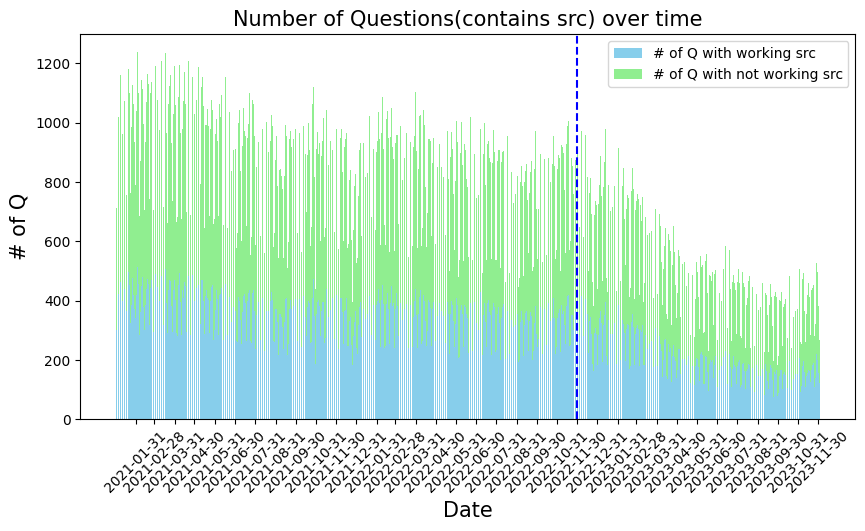

In [103]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(calc_ed_cnt['cdate'], calc_ed_cnt['calced_cnt'], color='skyblue', label = '# of Q with working src')
ax.bar(not_calc_ed_cnt['cdate'], not_calc_ed_cnt['notcalced_cnt'], bottom = calc_ed_cnt['calced_cnt'], color = 'lightgreen', label = '# of Q with not working src')

ax.set_title('Number of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [104]:
calc_ed_cnt

,cdate,calced_cnt,yyyymm
0,2021-01-01,229,2021-01
1,2021-01-02,302,2021-01
2,2021-01-03,318,2021-01
3,2021-01-04,391,2021-01
4,2021-01-05,421,2021-01
...,...,...,...
1062,2023-11-29,199,2023-11
1063,2023-11-30,218,2023-11
1064,2023-12-01,154,2023-12
1065,2023-12-02,121,2023-12


In [105]:
syn_tree_calc = pd.merge(calc_ed_cnt, not_calc_ed_cnt, on = 'cdate')

In [106]:
syn_tree_calc['calced_rate'] = (syn_tree_calc['calced_cnt']/(syn_tree_calc['calced_cnt'] + syn_tree_calc['notcalced_cnt'] ))*100

In [107]:
syn_tree_calc['notcalced_rate'] = 100 - syn_tree_calc['calced_rate']  

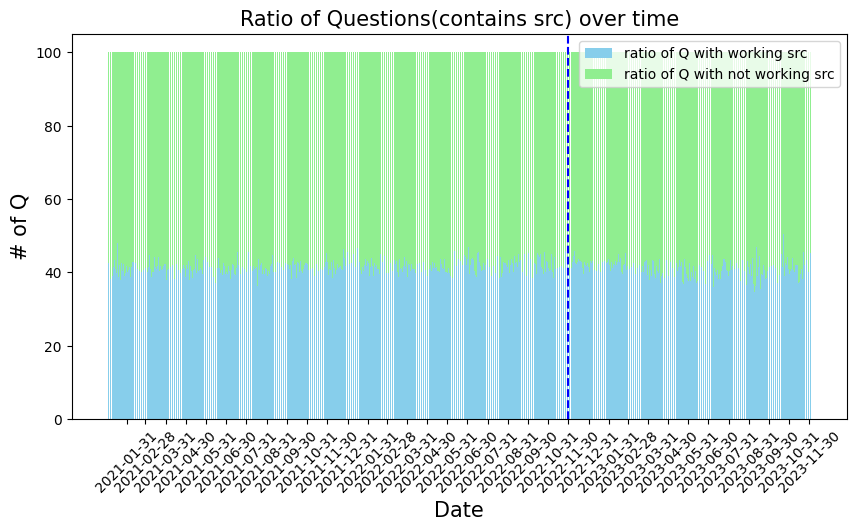

In [108]:
fig, ax = plt.subplots(figsize = (10, 5))

ax.bar(syn_tree_calc['cdate'], syn_tree_calc['calced_rate'], color='skyblue', label = 'ratio of Q with working src')
ax.bar(syn_tree_calc['cdate'], syn_tree_calc['notcalced_rate'], bottom = syn_tree_calc['calced_rate'], color = 'lightgreen', label = 'ratio of Q with not working src')

ax.set_title('Ratio of Questions(contains src) over time', fontsize = 15)
ax.set_xlabel('Date', fontsize = 15)
ax.set_ylabel('# of Q', fontsize = 15)
ax.set_xticks(major_xticks)

ax.axvline(major_xticks[22], # add vertical line
       color = 'blue',
       linestyle = '--',
       linewidth = 1.5)
ax.tick_params(axis='x', rotation=45)
ax.legend(loc = 'upper right', fontsize = 10) # add legend

plt.show();

In [109]:
calc_ed_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0


In [31]:
calc_ed_com_df = calc_ed_com_df.groupby('cdate').mean()[['Cognitive Complexity']].reset_index()

In [110]:
calc_ed_com_df.head()

,id,cdate,idx,src,Path,File Name,Cognitive Complexity
395794,65526401,2021-01-01,394902,"class Race:\n def __init__(self, name, pass...",394902_65526401.py,394902_65526401.py,0.0
395798,65526429,2021-01-01,394910,from pandas_datareader import data as web\nimp...,394910_65526429.py,394910_65526429.py,1.0
395804,65526527,2021-01-01,394924,from requests import get\n\ntry:\n r = get(...,394924_65526527.py,394924_65526527.py,1.0
395807,65526543,2021-01-01,394928,print(df.to_dict('index'))\n,394928_65526543.py,394928_65526543.py,0.0
395815,65526624,2021-01-01,394936,"subprocess.Popen('C.bat', creationflags=subpro...",394936_65526624.py,394936_65526624.py,0.0


In [111]:
calc_ed_com_box_df = calc_ed_com_df.copy()

In [112]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].str[:7]

In [113]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [114]:
ym_list

array(['2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06',
       '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
       '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06',
       '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12',
       '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06',
       '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12'],
      dtype=object)

In [115]:
[calc_ed_com_box_df[calc_ed_com_box_df['yyyymm']==x]  for x in ym_list]

[              id       cdate     idx  \
 395794  65526401  2021-01-01  394902   
 395798  65526429  2021-01-01  394910   
 395804  65526527  2021-01-01  394924   
 395807  65526543  2021-01-01  394928   
 395815  65526624  2021-01-01  394936   
 ...          ...         ...     ...   
 359390  65985388  2021-01-31  348902   
 359391  65985432  2021-01-31  348903   
 359392  65985447  2021-01-31  348904   
 359393  65985463  2021-01-31  348905   
 359398  65985517  2021-01-31  348910   
 
                                                       src                Path  \
 395794  class Race:\n    def __init__(self, name, pass...  394902_65526401.py   
 395798  from pandas_datareader import data as web\nimp...  394910_65526429.py   
 395804  from requests import get\n\ntry:\n    r = get(...  394924_65526527.py   
 395807                       print(df.to_dict('index'))\n  394928_65526543.py   
 395815  subprocess.Popen('C.bat', creationflags=subpro...  394936_65526624.py   
 ...          

In [116]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
# axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
# axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)
major_xticks = ['2022-01-30','2022-02-28','2022-03-30','2022-04-30','2022-05-30','2022-06-30','2022-07-30','2022-08-30','2022-09-30','2022-10-30','2022-11-30','2022-12-30',
                '2023-01-30','2023-02-28','2023-03-30','2023-04-30','2023-05-30','2023-06-30','2023-07-30','2023-08-30','2023-09-30','2023-10-30','2023-11-30','2023-12-30']
axs1_xticks = ym_list
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Avg Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
ym_list[:11]
# ym_list[12:]

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)

axs[0].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [ ]:
len(np.arange(2, 13, 1))

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)


axs[0].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]], positions=np.arange(1, 12, 1))
axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)



axs[1].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]], positions=np.arange(1, 25, 1))
axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [ ]:
calc_ed_com_df

In [56]:
bf = calc_ed_com_df[(calc_ed_com_df['cdate']>='2021-10-30')& (calc_ed_com_df['cdate']<='2021-12-30')]

In [57]:
af = calc_ed_com_df[(calc_ed_com_df['cdate']>='2022-10-31')& (calc_ed_com_df['cdate']<='2022-12-31')]

In [ ]:
bf['T_d'] = 0
af['T_d'] = 1

In [ ]:
bf['P_t'] = np.where(bf['cdate']>= '2021-11-30', 1, 0)
af['P_t'] = np.where(bf['cdate']>= '2021-12-01', 1, 0)

In [67]:
bfaf = pd.concat([bf, af], axis = 0)

In [76]:
bfaf = bfaf.rename(columns = {'Cognitive Complexity': "cc"})

In [ ]:
sm.ols('cc ~ T_d + P_t + T_d * P_t', bfaf).fit().summary().tables[1]